# Activation functions

## Neural networks

Let us see the differences between neural networks which apply ReLU and those which do not apply ReLU. We have already initialized the input called input_layer, and three sets of weights, called weight_1, weight_2 and weight_3.

We are going to convince ourselves that networks with multiple layers which do not contain non-linearity can be expressed as neural networks with one layer.

The network and the shape of layers and weights is shown below.
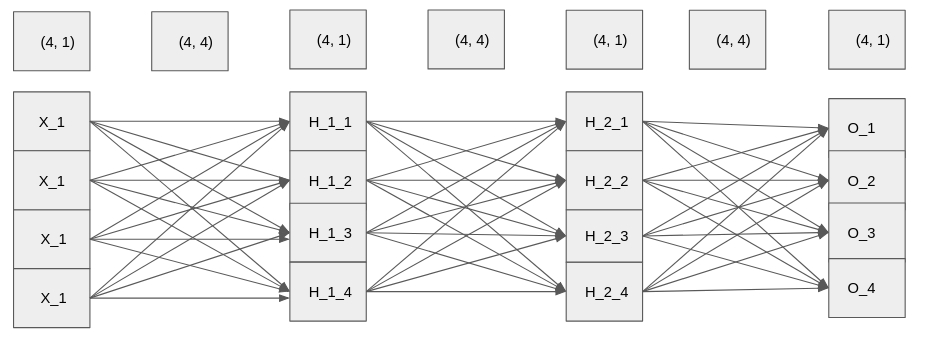


In [12]:
#init
import torch
import torch.nn as nn

input_layer = torch.randn((1,4))
weight_1 = torch.randn((4,4))
weight_2 = torch.randn((4,4))
weight_3 = torch.randn((4,4))

In [13]:
# Calculate the first and second hidden layer
hidden_1 = torch.matmul(input_layer, weight_1)
hidden_2 = torch.matmul(hidden_1, weight_2)

# Calculate the output
print(torch.matmul(hidden_2, weight_3))

# Calculate weight_composed_1 and weight
weight_composed_1 = torch.matmul(weight_1, weight_2)
weight = torch.matmul(weight_composed_1, weight_3)

# Multiply input_layer with weight
print(torch.matmul(input_layer, weight))

tensor([[-0.5127, -5.5054,  0.4032,  0.3122]])
tensor([[-0.5127, -5.5054,  0.4032,  0.3122]])


## ReLU activation

In this exercise, we have the same settings as the previous exercise. In addition, we have instantiated the ReLU activation function called relu().

Now we are going to build a neural network which has non-linearity and by doing so, we are going to convince ourselves that networks with multiple layers and non-linearity functions cannot be expressed as a neural network with one layer.

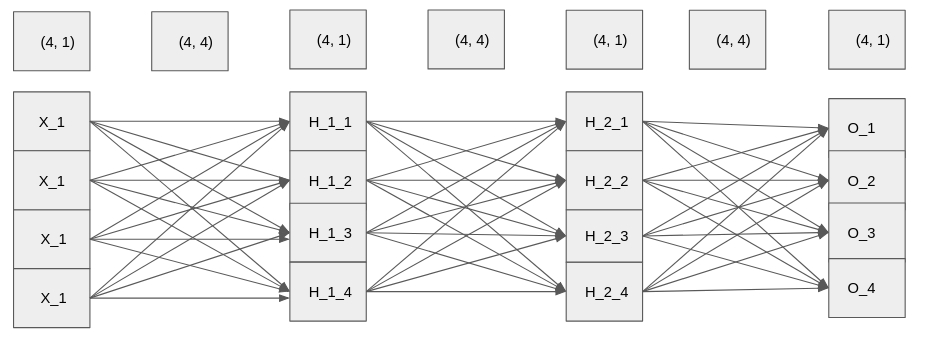

In [14]:
#init
relu = nn.ReLU()

In [15]:
# Apply non-linearity on hidden_1 and hidden_2
hidden_1_activated = relu(torch.matmul(input_layer, weight_1))
hidden_2_activated = relu(torch.matmul(hidden_1_activated, weight_2))
print(torch.matmul(hidden_2_activated, weight_3))

# Apply non-linearity in the product of first two weights. 
weight_composed_1_activated = relu(torch.matmul(weight_1, weight_2))

# Multiply `weight_composed_1_activated` with `weight_3
weight = torch.matmul(weight_composed_1_activated, weight_3)

# Multiply input_layer with weight
print(torch.matmul(input_layer, weight))

tensor([[0., 0., 0., 0.]])
tensor([[-0.9282, -1.9548,  0.8186, -0.1302]])


## ReLU activation again

Neural networks don't need to have the same number of units in each layer. Here, you are going to experiment with the ReLU activation function again, but this time we are going to have a different number of units in the layers of the neural network. The input layer will still have 4 features, but then the first hidden layer will have 6 units and the output layer will have 2 units.

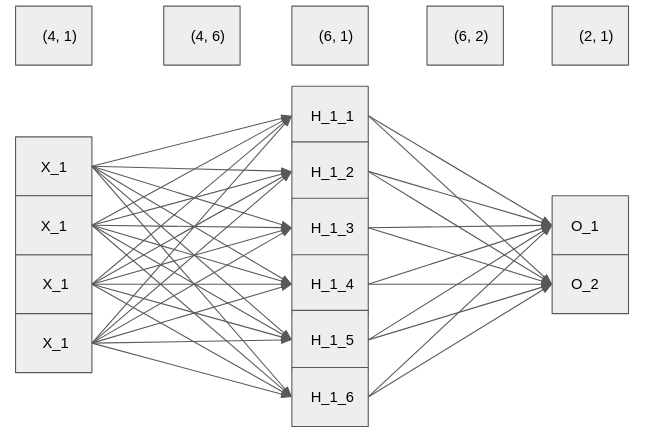

In [17]:
# Instantiate ReLU activation function as relu
relu = nn.ReLU()

# Initialize weight_1 and weight_2 with random numbers
weight_1 = torch.rand(4, 6)
weight_2 = torch.rand(6, 2)

# Multiply input_layer with weight_1
hidden_1 = torch.matmul(input_layer, weight_1)

# Apply ReLU activation function over hidden_1 and multiply with weight_2
hidden_1_activated = relu(hidden_1)
print(torch.matmul(hidden_1_activated, weight_2))

tensor([[0., 0.]])


# Loss functions

## Calculating loss function in PyTorch

You are going to code the previous exercise, and make sure that we computed the loss correctly. Predicted scores are -1.2 for class 0 (cat), 0.12 for class 1 (car) and 4.8 for class 2 (frog). The ground truth is class 2 (frog). Compute the loss function in PyTorch.
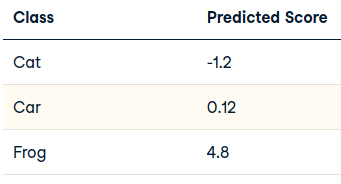


    Initialize the tensor of scores with numbers [[-1.2, 0.12, 4.8]], and the tensor of ground truth [2].
    Instantiate the cross-entropy loss and call it criterion.
    Compute and print the loss.


In [18]:
# Initialize the scores and ground truth
logits = torch.tensor([[-1.2, 0.12, 4.8]])
ground_truth = torch.tensor([2])

# Instantiate cross entropy loss
criterion = nn.CrossEntropyLoss()

# Compute and print the loss
loss = criterion(logits, ground_truth)
print(loss)

tensor(0.0117)


## Loss function of random scores

If the neural network predicts random scores, what would be its loss function? Let's find it out in PyTorch. The neural network is going to have 1000 classes, each having a random score. For ground truth, it will have class 111. Calculate the loss function.

In [19]:
# Import torch and torch.nn
import torch
import torch.nn as nn

# Initialize logits and ground truth
logits = torch.rand(1,1000)
ground_truth = torch.tensor([111])

# Instantiate cross-entropy loss
criterion = nn.CrossEntropyLoss()

# Calculate and print the loss
loss = criterion(logits, ground_truth)
print(loss)

tensor(6.6756)


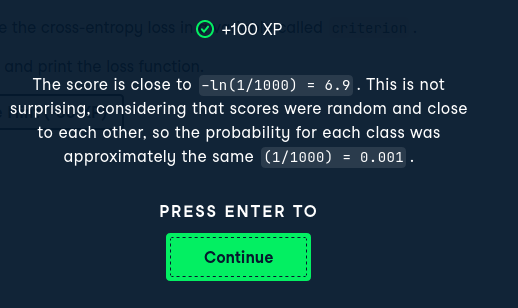

# Preparing a dataset in PyTorch


## Preparing MNIST dataset

You are going to prepare dataloaders for MNIST training and testing set. As we explained in the lecture, MNIST has some differences to CIFAR-10, with the main difference being that MNIST images are grayscale (1 channel based) instead of RGB (3 channels).


    Transform the data to torch tensors and normalize it, mean is 0.1307 while std is 0.3081.
    Prepare the trainset and the testset.
    Prepare the dataloaders for training and testing so that only 32 pictures are processed at a time.


In [21]:
#init
import torch
import torchvision
import torch.utils.data
import torchvision.transforms as transforms


In [22]:
# Transform the data to torch tensors and normalize it 
transform = transforms.Compose([transforms.ToTensor(),
								transforms.Normalize((0.1307), ((0.3081)))])

# Prepare training set and testing set
trainset = torchvision.datasets.MNIST('mnist', train=True, 
									  download=True, transform=transform)
testset = torchvision.datasets.MNIST('mnist', train=False,
			   download=True, transform=transform)

# Prepare training loader and testing loader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
										 shuffle=False, num_workers=0) 

100.1%

Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw


113.5%

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw


100.4%

Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw


180.4%

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw
Processing...
Done!


## Inspecting the dataloaders

Now you are going to explore a bit the dataloaders you created in the previous exercise. In particular, you will compute the shape of the dataset in addition to the minibatch size.

In [23]:
# Compute the shape of the training set and testing set
trainset_shape = trainloader.dataset.train_data.shape
testset_shape = testloader.dataset.test_data.shape

# Print the computed shapes
print(trainset_shape, testset_shape)

# Compute the size of the minibatch for training set and testing set
trainset_batchsize = trainloader.batch_size
testset_batchsize = testloader.batch_size

# Print sizes of the minibatch
print(trainset_batchsize, testset_batchsize)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])
32 32


/home/explore/miniconda3/envs/datacamp/lib/python3.7/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/explore/miniconda3/envs/datacamp/lib/python3.7/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


# Training neural networks

## Building a neural network - again

You haven't created a neural network since the end of the first chapter, so this is a good time to build one (practice makes perfect). Build a class for a neural network which will be used to train on the MNIST dataset. The dataset contains images of shape (28, 28, 1), so you should deduct the size of the input layer. For hidden layer use 200 units, while for output layer use 10 units (1 for each class). For activation function, use relu in a functional way (nn.Functional is already imported as F).

For context, the same net will be trained and used to make predictions in the next two exercises.

In [24]:
# Define the class Net
class Net(nn.Module):
    def __init__(self):    
    	# Define all the parameters of the net
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28 * 1, 200)
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x):   
    	# Do the forward pass
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## Training a neural network

Given the fully connected neural network (called model) which you built in the previous exercise and a train loader called train_loader containing the MNIST dataset (which we created for you), you're to train the net in order to predict the classes of digits. You will use the Adam optimizer to optimize the network, and considering that this is a classification problem you are going to use cross entropy as loss function.

In [26]:
#init
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# Instantiate the Adam optimizer and Cross-Entropy loss function
model = Net()   
optimizer = optim.Adam(model.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()
  
for batch_idx, data_target in enumerate(train_loader):
    data = data_target[0]
    target = data_target[1]
    data = data.view(-1, 28 * 28)
    optimizer.zero_grad()

    # Complete a forward pass
    output = model(data)

    # Compute the loss, gradients and change the weights
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

## Using the network to make predictions

Now that you have trained the network, use it to make predictions for the data in the testing set. The network is called model (same as in the previous exercise), and the loader is called test_loader. We have already initialized variables total and correct to 0.

In [ ]:
# Set the model in eval mode
model.eval()

for i, data in enumerate(test_loader, 0):
    inputs, labels = data
    
    # Put each image into a vector
    inputs = inputs.view(-1, 28*28)
    
    # Do the forward pass and get the predictions
    outputs = model(inputs)
    _, outputs = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (outputs == labels).sum().item()
print('The testing set accuracy of the network is: %d %%' % (100 * correct / total))